# Campaign A/B Testing

### The purpose of this work is to compare the results of two campaigns and determine whether there are significant differences between them

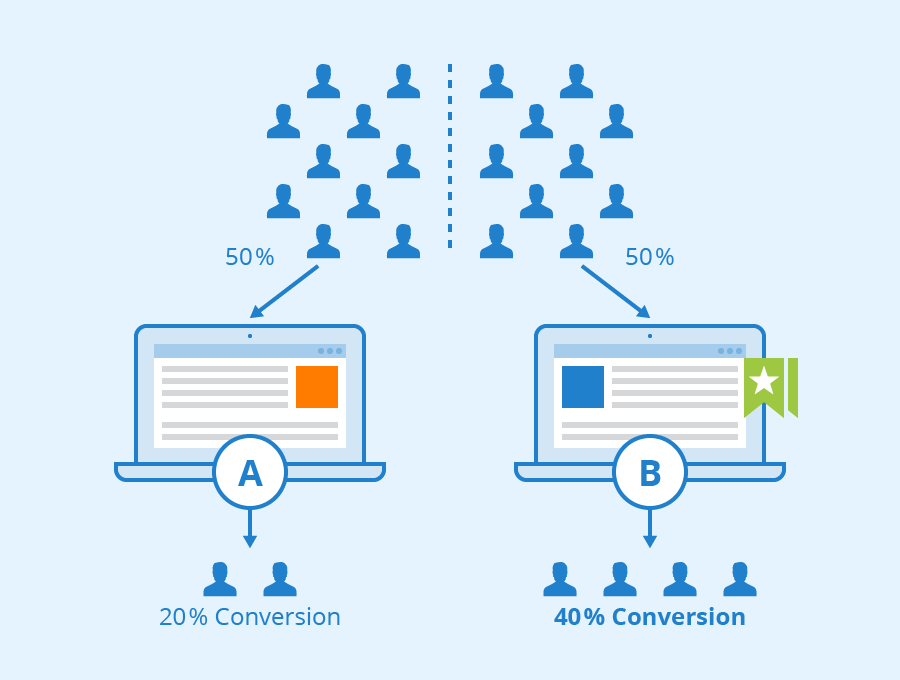

To begin with, you need to import the main libraries for analysis, visualization, as well as for the tests themselves

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

The datasets are contained in two separate files, which also need to be imported and named

In [2]:
control = pd.read_csv('C:\PytonDataSets\control_group.csv', encoding='utf-8', sep=";")
test = pd.read_csv('C:\\PytonDataSets\\test_group.csv', encoding='utf-8', sep=";")

Now that we've imported the data, we can take a look at what our tables look like

In [3]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


The first thing we can notice is that the tables are very similar with only one difference, the first contains only the value "Control Campaign" in the column "Campaign Name" and the second only "Test Campaign"

Also to understand what exactly the data in the other columns is:
- Campaign Name: The name of the campaign
- Date: Date of the record
- Spend: Amount spent on the campaign in dollars
- Number of Impressions: Number of impressions the ad crossed through the campaign
- Reach: The number of unique impressions received in the ad
- Number of Website Clicks: Number of website clicks received through the ads
- Number of Searches: Number of users who performed searches on the website
- Number of View Content: Number of users who viewed content and products on the website
- Number of Add to Cart: Number of users who added products to the cart
- Number of Purchase: Number of purchases

Based on this we can conclude that the data can simply be concatenated to create a single dataset (if needed)

In [5]:
combined_data = pd.concat([control, test], ignore_index=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        60 non-null     object 
 1   Date                 60 non-null     object 
 2   Spend [USD]          60 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   Reach                59 non-null     float64
 5   # of Website Clicks  59 non-null     float64
 6   # of Searches        59 non-null     float64
 7   # of View Content    59 non-null     float64
 8   # of Add to Cart     59 non-null     float64
 9   # of Purchase        59 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.8+ KB


We have 30 rows for each campaign, but you can see that there are also null values that can be very disruptive later on, so they need to be removed

In [6]:
combined_data = combined_data.dropna()

control_campaign_data = combined_data[combined_data['Campaign Name'] == 'Control Campaign']
test_campaign_data = combined_data[combined_data['Campaign Name'] == 'Test Campaign']

From this set of data, we can take back the data we need separately for each campaign.

For the analysis, it will also be useful to know which indicators have a serious relationship and here there is a certain difference between the two sets of data.

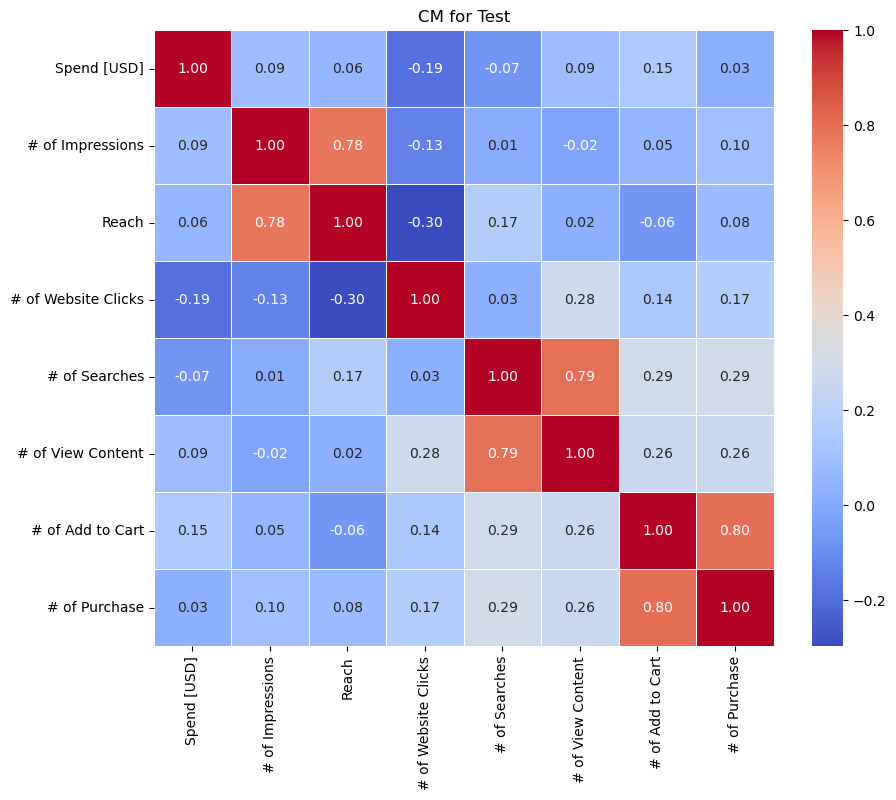

In [7]:
correlation_matrix = test.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CM for Test')
plt.show()

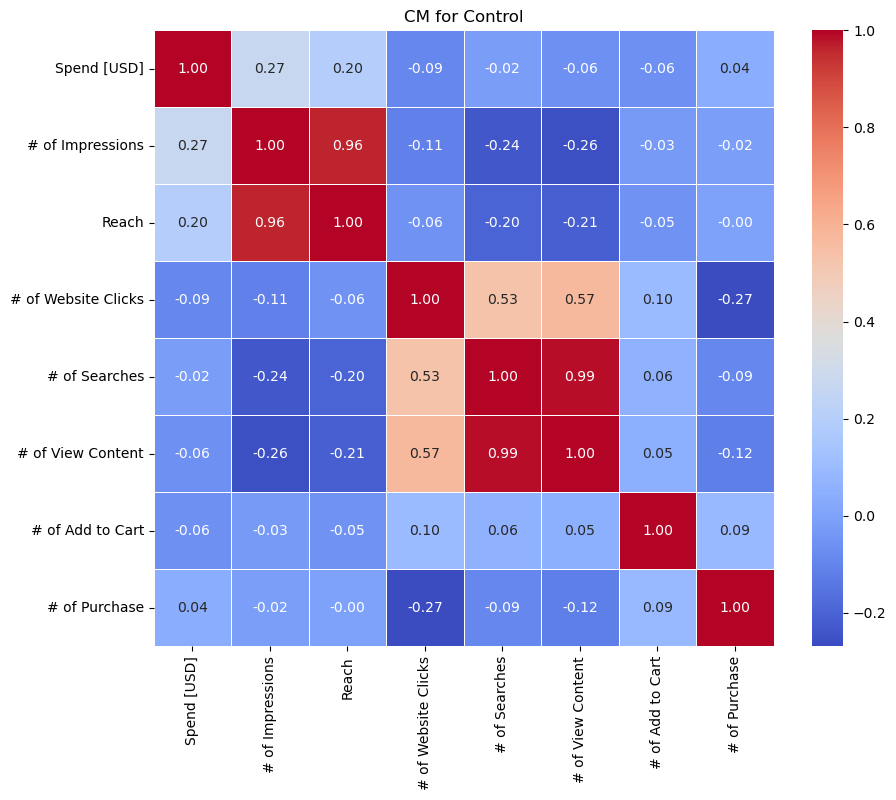

In [8]:
correlation_matrix = control.corr(numeric_only = True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CM for Control')
plt.show()

Here it can be observed that in the control campaign there is a very strong relationship between the number of impressions and coverage, as well as between the number of searches and views of the content, which cannot be said about the test data, but precisely in the test set there is a significant interdependence between the number of additions to the basket and number of purchases compared to control data.
This is not good or bad and there is not enough data to draw any conclusions, but there is a difference.

Next, we will build graphs that will simultaneously help us see the difference in the median, distribution, and outliers

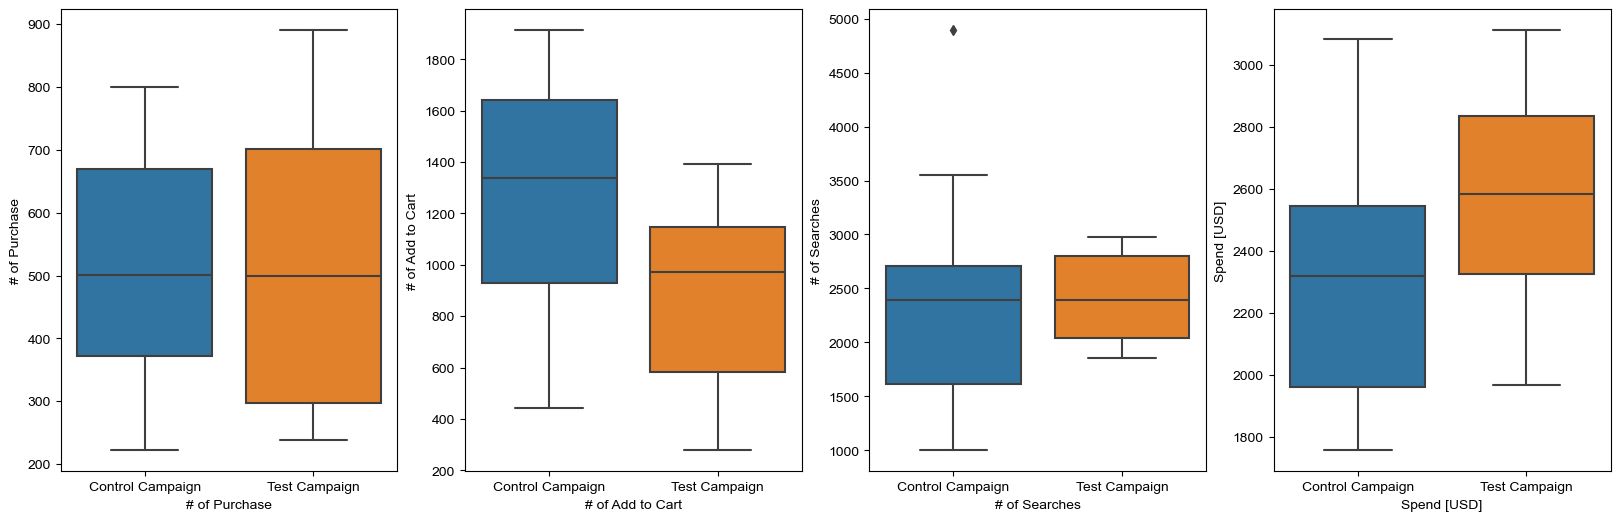

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

sns.set_style("white")

sns.boxplot(y = '# of Purchase', x = 'Campaign Name', data = combined_data, ax=axes[0])
axes[0].set_xlabel('# of Purchase')

sns.boxplot(y = '# of Add to Cart', x = 'Campaign Name', data = combined_data, ax=axes[1])
axes[1].set_xlabel('# of Add to Cart')

sns.boxplot(y = '# of Searches', x = 'Campaign Name', data = combined_data, ax=axes[2])
axes[2].set_xlabel('# of Searches')

sns.boxplot(y = 'Spend [USD]', x = 'Campaign Name', data = combined_data, ax=axes[3])
axes[3].set_xlabel('Spend [USD]')

plt.show()

In order not to build many graphs, 4 most important indicators were highlighted. From these graphs it is clear that there are some differences between the data, but there is no significant difference between the average values ​​of the number of purchases and the number of searches for both campaigns (less likely that the test will show a difference), while the difference between the number of carts and money spent where bigger We can also see one minor outlier for the control group, which should not affect the results much.

One of the important requirements for conducting a t-test is the normal distribution, which we have to check and if the distribution is not such, it is better to use alternative tests.
We will also create an empty dataframe for future test results.

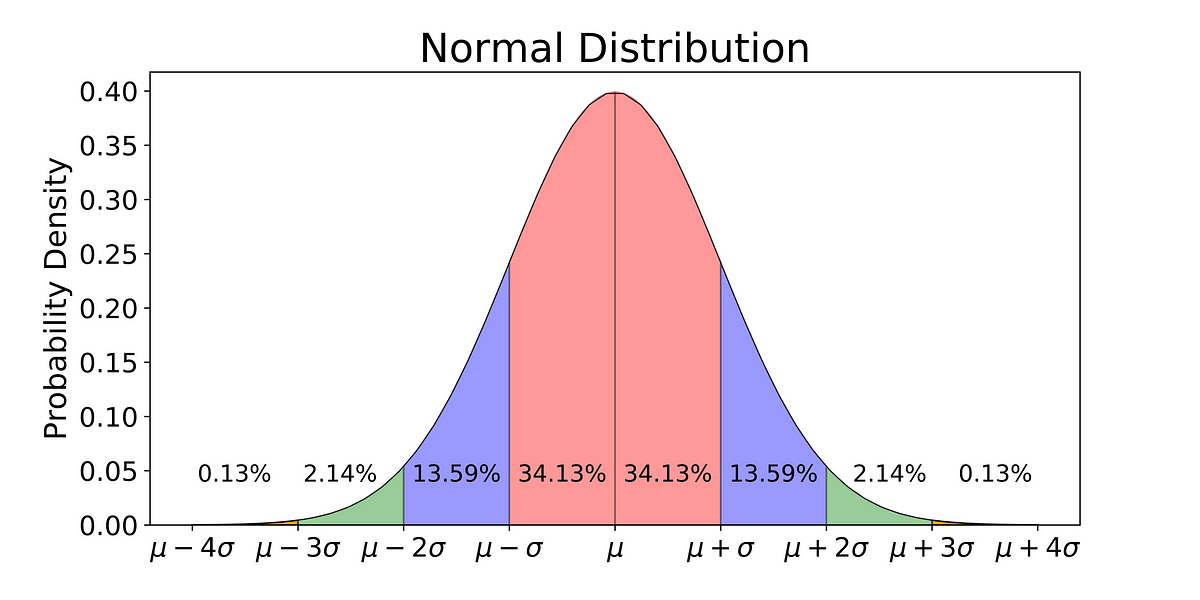

In [10]:
list_headers = combined_data.columns.tolist()
column_headers = list_headers[2:]
results = pd.DataFrame()

Testing for normality will be performed using the Shapiro-Wilk test, where the null hypothesis is that the data are normally distributed.

In [14]:
print('Test data:\n')

row = 0

for header in column_headers:
    stat, p_value = shapiro(test_campaign_data[header])
    print(f'Shapiro-Wilk test for {header}: Statistic={stat}, p-value={p_value}')
    if p_value <= 0.05:
        print('Not Normal Distribution!')
        print('-' * 120)
    else:
        print('Normal Distribution!')
        print('-' * 120)
    
row = 0

print('\nControl data:\n')

for header in column_headers:
    stat, p_value = shapiro(control_campaign_data[header])
    print(f'Shapiro-Wilk test for {header}: Statistic={stat}, p-value={p_value}')
    if p_value <= 0.05:
        print('Not Normal Distribution!')
        print('-' * 120)
    else:
        print('Normal Distribution!')
        print('-' * 120)

Test data:

Shapiro-Wilk test for Spend [USD]: Statistic=0.9440771341323853, p-value=0.11714765429496765
Normal Distribution!
------------------------------------------------------------------------------------------------------------------------
Shapiro-Wilk test for # of Impressions: Statistic=0.9484544396400452, p-value=0.15366658568382263
Normal Distribution!
------------------------------------------------------------------------------------------------------------------------
Shapiro-Wilk test for Reach: Statistic=0.9324316382408142, p-value=0.05699513852596283
Normal Distribution!
------------------------------------------------------------------------------------------------------------------------
Shapiro-Wilk test for # of Website Clicks: Statistic=0.9062409400939941, p-value=0.011976935900747776
Not Normal Distribution!
------------------------------------------------------------------------------------------------------------------------
Shapiro-Wilk test for # of Searches:

As you can see from the results, some of the data is normally distributed and some is not, so we will apply different tests.

Let's review how 2 non-normal distributions and 2 normal distributions look like

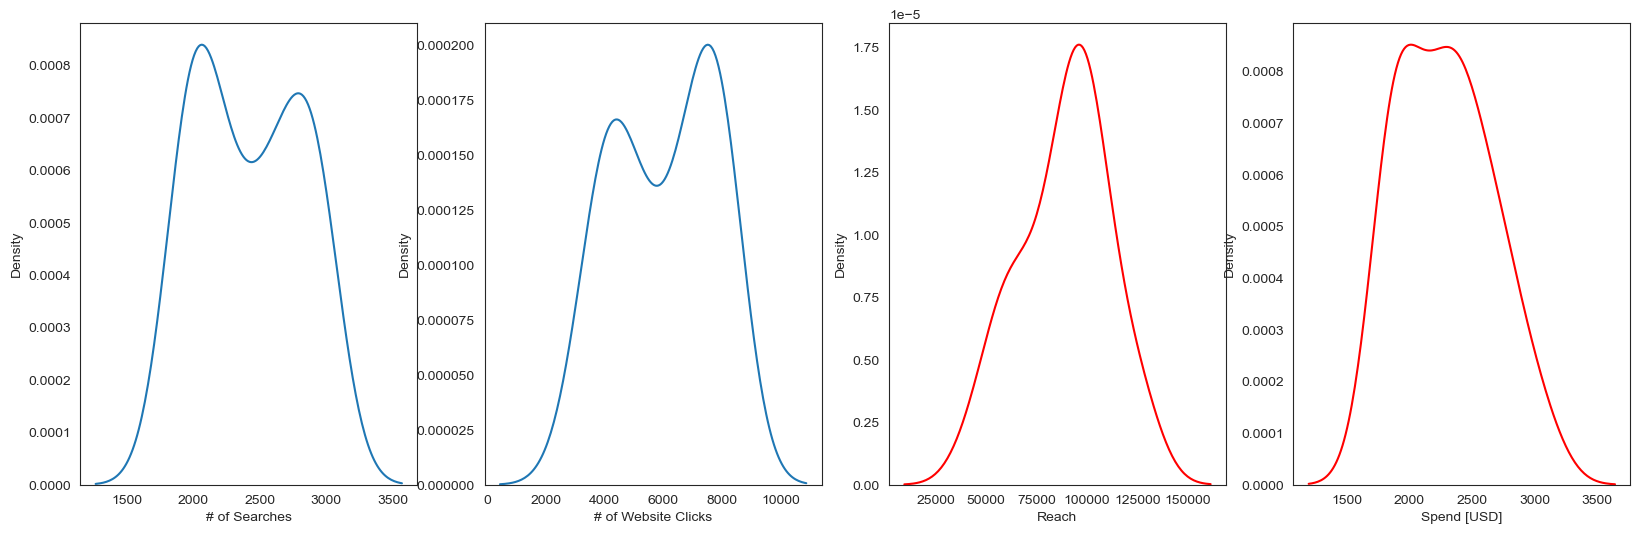

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

sns.set_style("white")

sns.kdeplot(data = test['# of Searches'], ax=axes[0])
axes[0].set_xlabel('# of Searches')

sns.kdeplot(data = test['# of Website Clicks'], ax=axes[1])
axes[1].set_xlabel('# of Website Clicks')

sns.kdeplot(data = control['Reach'], color = 'red', ax=axes[2])
axes[2].set_xlabel('Reach')

sns.kdeplot(data = control['Spend [USD]'], color ='red', ax=axes[3])
axes[3].set_xlabel('Spend [USD]')

plt.show()

Now we will conduct 2 tests for each column, the data will be entered in a table for greater visibility, the null hypothesis will be that there is no statistical difference between the two sets of data

In [12]:
for header in column_headers:
    stat, p_value = mannwhitneyu(test_campaign_data[header], control_campaign_data[header])
    print(f'Wilcoxon Test for {header}: Statistic={stat}, p-value={p_value}')
    if p_value <= 0.05:
        print('There is a statistical difference!')
        print('-' * 120)
    else:
        print('There is no statistical difference!')
        print('-' * 120)
    results.loc['Wilcoxon', header] = p_value

print('\nt-test:\n')
        
for header in column_headers:
    stat, p_value = ttest_ind(test_campaign_data[header], control_campaign_data[header])
    print(f't-test for {header}: Statistic={stat}, p-value={p_value}')
    if p_value <= 0.05:
        print('There is a statistical difference!')
        print('-' * 120)
    else:
        print('There is no statistical difference!')
        print('-' * 120)
    results.loc['t-test', header] = p_value

Wilcoxon Test for Spend [USD]: Statistic=613.0, p-value=0.00711852437564885
There is a statistical difference!
------------------------------------------------------------------------------------------------------------------------
Wilcoxon Test for # of Impressions: Statistic=173.0, p-value=7.344126278759323e-05
There is a statistical difference!
------------------------------------------------------------------------------------------------------------------------
Wilcoxon Test for Reach: Statistic=151.0, p-value=1.7202314302800555e-05
There is a statistical difference!
------------------------------------------------------------------------------------------------------------------------
Wilcoxon Test for # of Website Clicks: Statistic=533.0, p-value=0.13932985609787188
There is no statistical difference!
------------------------------------------------------------------------------------------------------------------------
Wilcoxon Test for # of Searches: Statistic=524.0, p-value=0

In [13]:
results

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
Wilcoxon,0.007119,0.000073,0.000017,0.139330,0.179644,0.921490,0.000531,0.957675
t-test,0.007093,0.000009,0.000002,0.120351,0.260157,0.635784,0.000080,0.976057


From the results, it can be found that the difference is only between 4 indicators: The amount of funds spent on the campaign, the number of impressions, reach, and the number of additions to the cart.
We are mainly interested in the number of purchases, there is no significant difference between them, so it is difficult to say whether one of the campaigns is more successful.

But let's review which of the campaigns was better in those indicators in which there are differences.

In [30]:
print('Test campaign Spend [USD] mean:')
print(test['Spend [USD]'].mean())
print('\nControl campaign Spend [USD] mean:')
print(control['Spend [USD]'].mean())

print('\nTest campaign # of Impressions mean:')
print(test['# of Impressions'].mean())
print('\nControl campaign # of Impressions mean:')
print(control['# of Impressions'].mean())

print('\nTest campaign Reach mean:')
print(test['Reach'].mean())
print('\nControl campaign Reach mean:')
print(control['Reach'].mean())

print('\nTest campaign # of Add to Cart mean:')
print(test['# of Add to Cart'].mean())
print('\nControl campaign # of Add to Cart mean:')
print(control['# of Add to Cart'].mean())

Test campaign Spend [USD] mean:
2563.0666666666666

Control campaign Spend [USD] mean:
2288.4333333333334

Test campaign # of Impressions mean:
74584.8

Control campaign # of Impressions mean:
109559.75862068965

Test campaign Reach mean:
53491.566666666666

Control campaign Reach mean:
88844.93103448275

Test campaign # of Add to Cart mean:
881.5333333333333

Control campaign # of Add to Cart mean:
1300.0


Conclusion:
Based on the results of the comparison of the test and control group, it can be argued that the control campaign is somewhat more rational, as with lower costs ($275), it has a greater number of impressions, greater reach and a greater number of items added to the cart. The difference is significant. Therefore, my personal recommendation is to conduct only a control campaign